In [27]:
%load_ext autoreload
%autoreload 2

import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

## Ajout du chemin source
import os
import sys
NumAppPath = os.path.abspath('../../NumApp')
sys.path.append(NumAppPath)

from numApp import getDistanceMatrix,getFeaturesList,getClusterIdx
from ImageProcessing.processing import cropToCoin

## Paramètres 
plt.rcParams["figure.figsize"] = (15,10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
param = {
    ##### Algo Param
    "longeur RBF":6,
    "nombre features":200,
    "denoiseTV weight": 0.2,
    "alpha": 7,
    "reprojThreshold":4,
    
    
    ##### Config param
    "Features Folder":"Features19/",
    "Data Folder":"dataTest",
    "Multiprocess Pool":6,
}

#Si pas de calcul
dataMatrix = "DistMatrixTest.npy"

dataPath = os.path.join(NumAppPath,param["Data Folder"])
dataList = sorted(os.listdir(dataPath))

In [68]:
DRaw = np.load(dataMatrix)
nb,b = np.shape(DRaw)

trueLiaisons = ["11557 - 11641",
                "11621 - 36848",
                "13310 - 34437",
                "15953 - 31336",
                "16663 - 18856"]

In [69]:
def ajouter(clst:np.ndarray,D):
    n, = np.shape(clst)
    for i in range(n):
        for j in range(i,n):
            idx = clst[i]
            idy = clst[j]
            D[idx,idy]=1
    return D

In [70]:
def getMatrixFromClusters(nb:int,Clusters:list)->np.ndarray:
    DClust = np.zeros((nb,nb))
    
    for clst in Clusters:
        n, = np.shape(clst)
        if n>= 2:
            DClust = ajouter(sorted(clst,reverse=True),DClust)
            
    ## Remplir le haut
    for i in range(nb):
        for j in range(i,nb):
            DClust[i,j]=np.nan
            
    return DClust

def getMatrixFromLiaisons(nb:int,dataList:list,trueLiaisons:list)->np.ndarray:
    
    DTrue = np.zeros((nb,nb))
    idxId = []
    for name in dataList:
        idxId.append(''.join(c for c in name if c.isdigit()))
        
    for liaison in trueLiaisons:
        currentLiaison = []
        for i in range(len(idxId)):
            if idxId[i] in liaison:
                currentLiaison.append(i)
        
        DTrue = ajouter(sorted(currentLiaison,reverse=True),DTrue)

    
    for i in range(nb):
            for j in range(i,nb):
                DTrue[i,j]=np.nan
                
    return DTrue

def miseEnFormePourComparaison(D):
    out = D.ravel()
    out = out[~np.isnan(out)]
    return out

In [71]:
[nbCluster,Clusters]=getClusterIdx(DRaw,20)

clustMat = getMatrixFromClusters(nb,Clusters)
trueMat = getMatrixFromLiaisons(nb,dataList,trueLiaisons)


In [72]:

def getPerf(trueMat,clustMat):
    
    trueOnes = miseEnFormePourComparaison(trueMat)
    foundOnes = miseEnFormePourComparaison(clustMat)
    n,= np.shape(trueOnes)
    
    TN = 0
    TP = 0
    FN = 0
    FP = 0 

    for i in range(n):
        #Si positif
        if trueOnes[i]==1:
            if foundOnes[i]==1:
                # Vrai positif
                TP = TP +1
            else:
                #Faux négatif
                FN = FN +1
        # Si négatif
        else:
            if foundOnes[i]==1:
                # Faux positif
                FP = FP+1
            else:
                #Vrai négatif
                TN = TN +1
        
    return [TP,TN,FP,FN]

    

In [73]:
distList = np.linspace(0.1,100,100)

sensList = []
fdrList = []

stdList = []
meanList = []



for dist in distList:
    
    [nbCluster,Clusters]=getClusterIdx(DRaw,dist)

    clustMat = getMatrixFromClusters(nb,Clusters)
    trueMat = getMatrixFromLiaisons(nb,dataList,trueLiaisons)
    
    [TP,TN,FP,FN] = getPerf(trueMat,clustMat)
    
    if TP != 0:
        sensitivity = TP/(TP+FN)
    else : 
        sensitivity = 0

    if FP != 0: fdr = FP/(FP+TP)
    else :fdr = 0
        

    
    distIntra = getDistIntraCluster(nbCluster,Clusters)
    
    stdList.append(np.std(distIntra))
    meanList.append(np.mean(distIntra))
    sensList.append(sensitivity)
    fdrList.append(fdr)


D:\Users\alexa\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Users\alexa\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
D:\Users\alexa\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Users\alexa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Users\alexa\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Users\alexa\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice

D:\Users\alexa\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Users\alexa\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
D:\Users\alexa\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Users\alexa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Users\alexa\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Users\alexa\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice

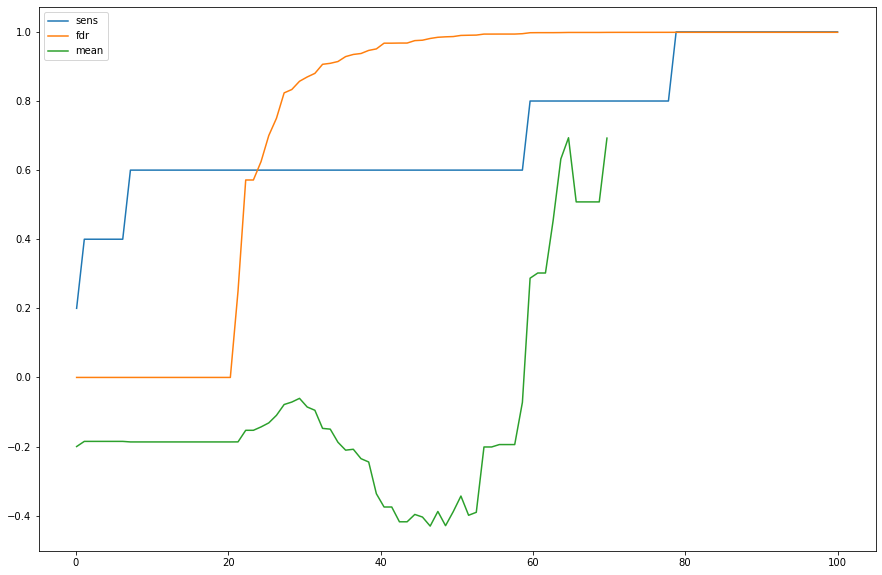

In [82]:



plt.plot(distList,sensList,label = "sens")
plt.plot(distList,fdrList,label = "fdr")
#.plot(distList,stdList,label = "std")
plt.plot(distList[:70],(meanList[:70]-np.nanmean(meanList))/10,label = "mean")
plt.legend()

In [75]:
[nbCluster,Clusters]=getClusterIdx(DRaw,30)
print(getStdDistIntraCluster(nbCluster,Clusters))

NameError: name 'getStdDistIntraCluster' is not defined

In [ ]:
def getDistIntraCluster(nbCluster,Clusters):

    DIntraClustMatrix = np.zeros((nbCluster,nbCluster))
    DIntraClustMatrix.fill(np.nan)

    for i in range(nbCluster):
        for j in range(i):
            clst1 = Clusters[i]
            clst2 = Clusters[j]
            dmin = 1e10
            for idx1 in clst1:
                for idx2 in clst2:
                    if idx1>idx2:
                        d = DRaw[idx1,idx2]
                    else:
                        d = DRaw[idx2,idx1]
                if d<dmin: dmin = d

            DIntraClustMatrix[i,j] = dmin
            
    Dhist = miseEnFormePourComparaison(DIntraClustMatrix)
    

    return(Dhist)

In [ ]:
Dhist = miseEnFormePourComparaison(DIntraClustMatrix)

plt.hist(Dhist,100)
plt.show()

print(np.std(Dhist))


